## 🛒 Big Mart Sales Prediction


Importing The Dependencies

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split

📊 Data Collection & Analysis

In [3]:
# Loading te Dataset from csv file to a Pandas DataFrame
big_mart_data = pd.read_csv(r'C:\Users\hardi\Downloads\Test.csv')

In [4]:
#first 5 rows of the DataFrame
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Number of data points & Number of Features
big_mart_data.shape

(5681, 11)

In [6]:
# Getting some Information about te dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### 🏷️ Categorical Features:

-  Item_Identifier  
- Item_Fat_Content  
- Item_Types  
- Outlet_Identifier
- Outlet_Siza
- Outlet_Location_Types
- Outlet_Types


In [7]:
# Cheking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Handling Missing Value

  - Mean---> Average Value
  - Mode---> Most Repeated Value

In [8]:
# mean value of 'Item Weight'
big_mart_data['Item_Weight'].mean()

np.float64(12.695633368756642)

In [9]:
# filling the missing values in 'Item_Weight' column eith 'Mean' Value
big_mart_data['Item_Weight'] = big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean())

In [10]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Replacing the missing values in "Outlet_size" with mode

In [11]:
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns = 'Outlet_Type',aggfunc = (lambda X:X.mode([0])))

In [12]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [14]:
missing_values

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [15]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Size'].apply(lambda X:mode_of_Outlet_size)

In [16]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### Data Analysis

In [17]:
# statistical Measure about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


#### ➕ Numerical Features 

In [18]:
sns.set()

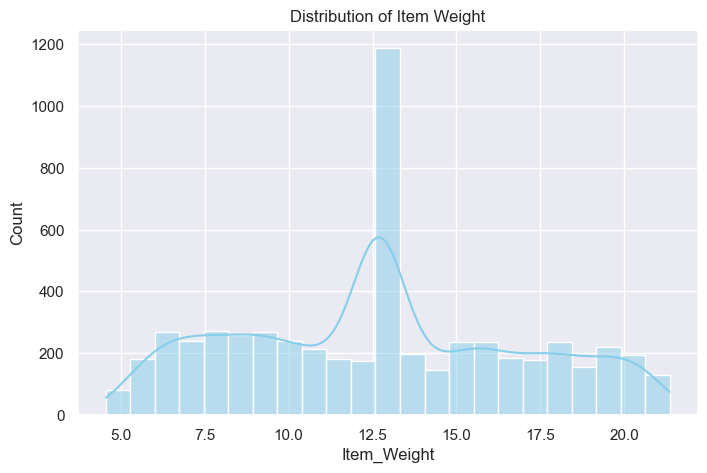

In [19]:
#Item Weight Distribution
plt.figure(figsize=(8,5))
sns.histplot(big_mart_data['Item_Weight'], kde=True, color='skyblue')  # mimics distplot
plt.title("Distribution of Item Weight")
plt.show()

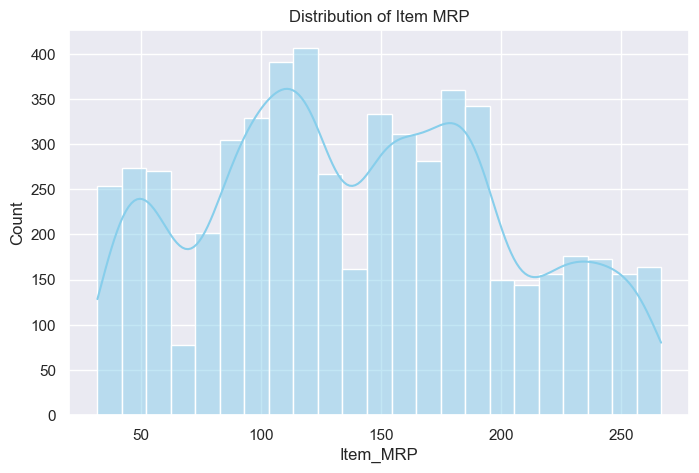

In [21]:
#Item MRP Distribution

plt.figure(figsize=(8,5))
sns.histplot(big_mart_data['Item_MRP'], kde=True, color='skyblue')  # mimics distplot
plt.title("Distribution of Item MRP")
plt.show()

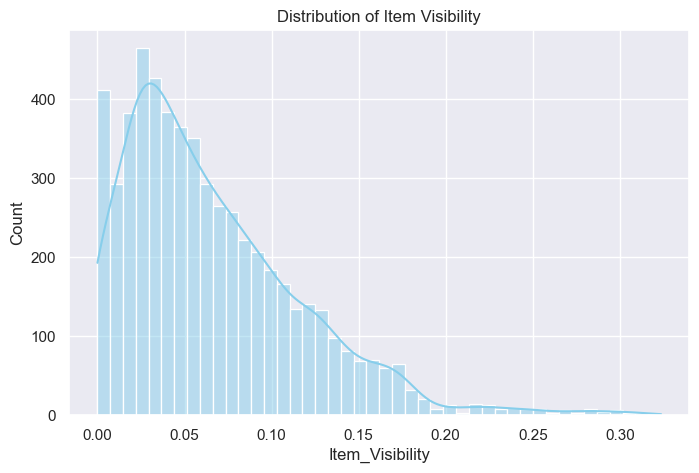

In [22]:
#Item Visibility Distribution

plt.figure(figsize=(8,5))
sns.histplot(big_mart_data['Item_Visibility'], kde=True, color='skyblue')  # mimics distplot
plt.title("Distribution of Item Visibility")
plt.show()

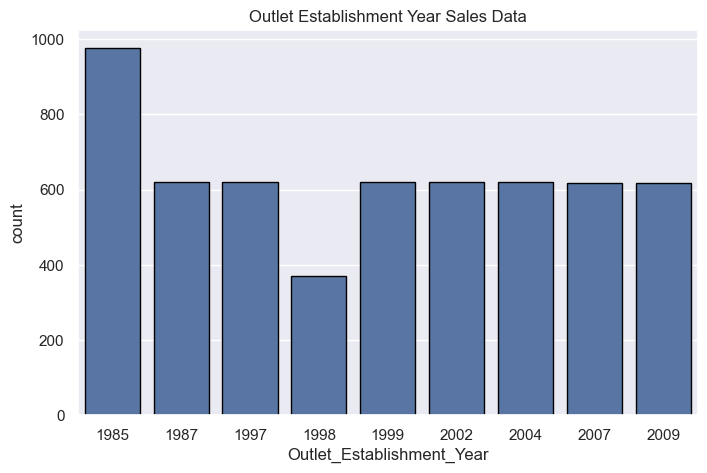

In [23]:
# Outlet_Established_Year column
plt.figure(figsize=(8,5))
sns.countplot(x= 'Outlet_Establishment_Year',data=big_mart_data,edgecolor = 'Black')
plt.title('Outlet Establishment Year Sales Data')
plt.show()

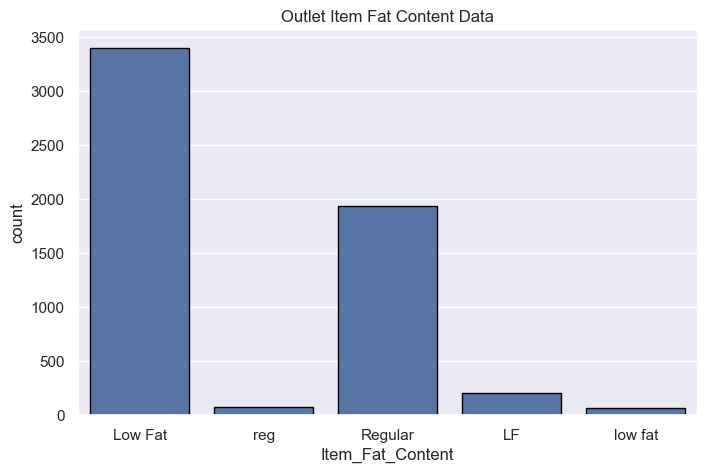

In [24]:
# Item_Fat_Content Column
plt.figure(figsize=(8,5))
sns.countplot(x= 'Item_Fat_Content',data=big_mart_data,edgecolor = 'Black')
plt.title('Outlet Item Fat Content Data')
plt.show()

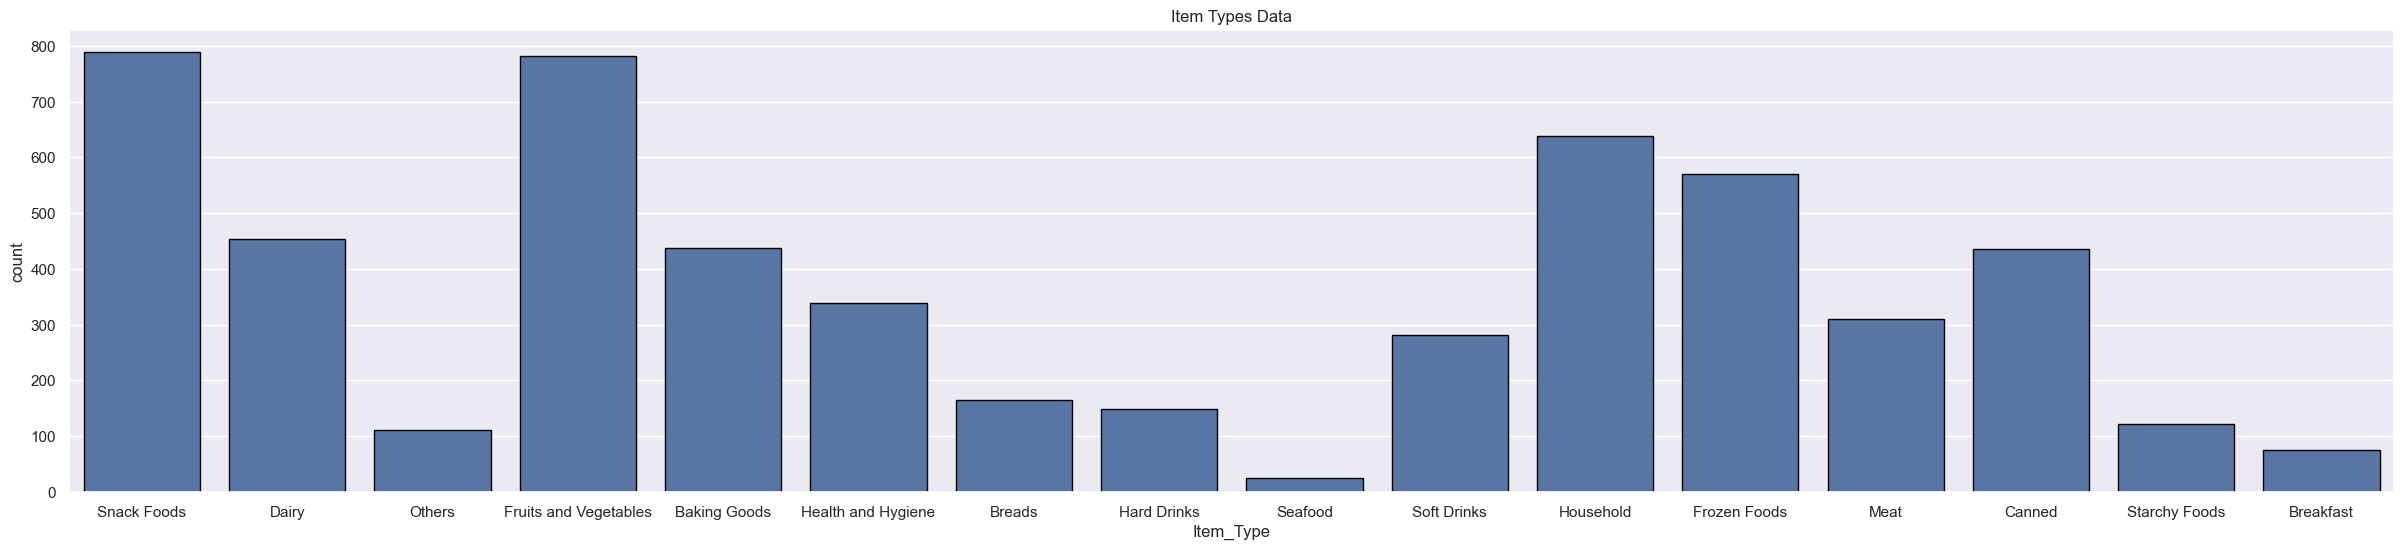

In [25]:
# Item_Type Column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart_data,edgecolor = 'Black')
plt.title('Item Types Data')
plt.show()

#### 📊 Data Pre-Processing

In [26]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [27]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [29]:
big_mart_data.replace({'Item_Fat_Content':{'low fat': 'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [30]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

#### Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

big_mart_data['Item_Identifier'] = LabelEncoder().fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = LabelEncoder().fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = LabelEncoder().fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = LabelEncoder().fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].astype(str)
big_mart_data['Outlet_Size'] = LabelEncoder().fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = LabelEncoder().fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = LabelEncoder().fit_transform(big_mart_data['Outlet_Type'])


In [36]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1103,0.007565,1103,107.8622,1103,1999,1,0,1
1,1067,8.300000,1067,0.038428,1067,87.3198,1067,2007,2,1,1
2,1406,14.600000,1406,0.099575,1406,241.7538,1406,1998,2,2,0
3,809,7.315000,809,0.015388,809,155.0340,809,2007,2,1,1
4,1184,12.695633,1184,0.118599,1184,234.2300,1184,1985,1,2,3


In [38]:
X = big_mart_data.drop(columns = 'Item_MRP',axis=1)
Y = big_mart_data['Item_MRP']

In [39]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000              1103         0.007565   
1                1067     8.300000              1067         0.038428   
2                1406    14.600000              1406         0.099575   
3                 809     7.315000               809         0.015388   
4                1184    12.695633              1184         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000               231         0.013496   
5677              306     7.600000               306         0.142991   
5678             1412    10.000000              1412         0.073529   
5679              517    15.300000               517         0.000000   
5680              987     9.500000               987         0.104720   

      Item_Type  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0          1103               1103           

In [40]:
print(Y)

0       107.8622
1        87.3198
2       241.7538
3       155.0340
4       234.2300
          ...   
5676    141.3154
5677    169.1448
5678    118.7440
5679    214.6218
5680     79.7960
Name: Item_MRP, Length: 5681, dtype: float64


Spliting the data into date & Testing Data

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
print(X.shape,X_train.shape,X_test.shape)

(5681, 10) (4544, 10) (1137, 10)


#### ⚙️ **Machine Learning Model Training** ⚙️


In [53]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train);

In [70]:
# Prediction on Training Data
Training_data_prediction = regressor.predict(X_train)

In [60]:
#R Square Value
r2_train = metrics.r2_score(Y_train,training_data_pediction)

In [51]:
print('R Squared Value = ',r2_train)

R Squared Value =  0.8604886777237072


In [69]:
# Prediction on test Data
test_data_prediction = regressor.predict(X_test)

In [72]:
# R Square Value
re_test = metrics.r2_score(Y_test,test_data_prediction)

In [74]:
print("R Square Value = ",r2_test)

R Square Value =  0.8604886777237072
